In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_csv("delhivery_data.csv")

In [3]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# Problem statement:
# Clean, sanitize and manipulate the raw data of Delhivery to extract meaningful insights and carry out feature engineering.

In [17]:
df.shape

(144867, 24)

In [18]:
# Statistical summary
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [143]:
# We will convert the data type of few columns
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"],format = "%Y-%m-%d %H:%M:%S.%f")
df["od_start_time"] = pd.to_datetime(df["od_start_time"],format = "%Y-%m-%d %H:%M:%S.%f")
df["od_end_time"] = pd.to_datetime(df["od_end_time"],format = '%Y-%m-%d %H:%M:%S.%f')
df["cutoff_timestamp"] = pd.to_datetime(df["cutoff_timestamp"],format = "mixed")
df[["data","route_type"]] = df[["data","route_type"]].astype("category")

In [144]:
# We will rename few columns for easier readability
df.rename(columns = {"segment_factor":"segment_act_time/osmr_time",
                    "factor": "actual_time/osmr_time",
                    "cutoff_timestamp": "actual_delivery_time"}, inplace =True)

In [145]:
# We will drop is_cutoff since it is of no use, we will also drop "cutoff factor" since this number 
# is already being reflected in the column "actual_distance_to_destination"
df.drop(columns = ["is_cutoff","cutoff_factor"], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [12]:
# Checking for missing values
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_delivery_time                0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
actual_time/osmr_time               0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_act_time/osmr_time          0
dtype: int64

In [146]:
source = df[["source_center","source_name"]].drop_duplicates()
destination = df[["destination_center","destination_name"]].drop_duplicates()

In [147]:
merged = df.merge(source, on = "source_center", how = "left").merge(destination, on = "destination_center", how = "left").drop(["destination_name_x","source_name_x"], axis =1)

In [8]:
merged.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
destination_center                  0
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_delivery_time                0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
actual_time/osmr_time               0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_act_time/osmr_time          0
source_name_y                     293
destination_name_y                261
dtype: int64

### Here we see that, even after obtaining source name and destination name from source_center and destination_center resp. we still have the same no. of null values. Therefore, all the null value belong to the same source_center and destination_center. So we will have to impute the null values with the mode if the entire data, since it is not a numerical data.

In [148]:
df["source_name"] = df["source_name"].fillna(df["source_name"].mode()[0])
df["destination_name"] = df["destination_name"].fillna(df["destination_name"].mode()[0])

In [149]:
df["source_name"].mode()

0    Gurgaon_Bilaspur_HB (Haryana)
Name: source_name, dtype: object

In [150]:
df["destination_name"].mode()

0    Gurgaon_Bilaspur_HB (Haryana)
Name: destination_name, dtype: object

In [18]:
df.isna().sum()
# Now there are no null values

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_delivery_time              0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
actual_time/osmr_time             0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_act_time/osmr_time        0
dtype: int64

In [13]:
df["source_name"].mode()

0    Gurgaon_Bilaspur_HB (Haryana)
Name: source_name, dtype: object

## EDA - Basic visual analysis

<Axes: xlabel='data', ylabel='count'>

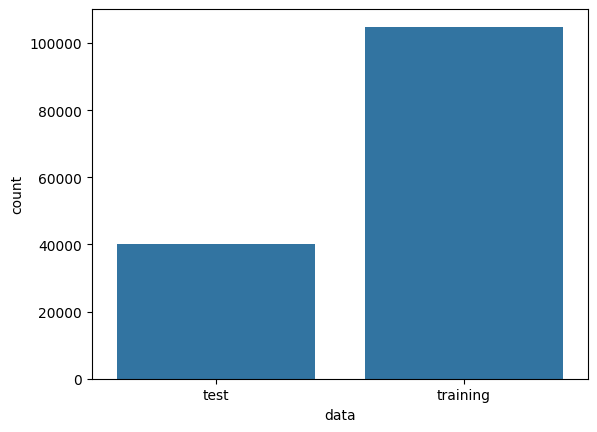

In [19]:
# Lets see how much is the distribution of training and test data
sns.countplot(data = df, x = df["data"])

<Axes: xlabel='route_type', ylabel='count'>

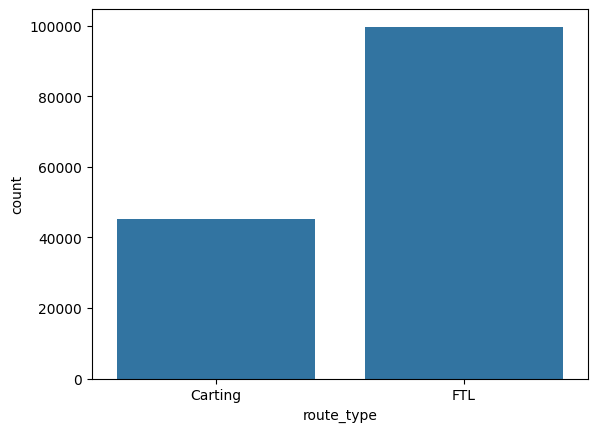

In [22]:
# Lets see how much is the distribution of route_type
sns.countplot(data = df, x = df["route_type"])

In [11]:
def outlier_func(arr):
    q1 = np.percentile(arr,25)
    q2 = np.percentile(arr,75)
    iqr = 1.5*(q2 - q1)
    low = max(q1 - iqr,0)
    high = q2 + iqr
    outliers = arr[(arr>high) | (arr<low)]
    return outliers

<Axes: xlabel='segment_osrm_distance'>

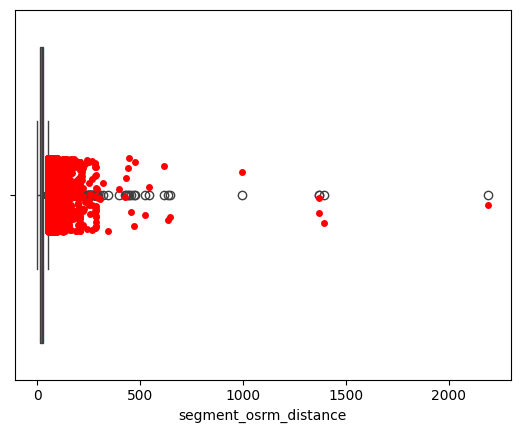

In [102]:
# Outliers in "segment_osrm_distance" column
sns.boxplot(x = df["segment_osrm_distance"])
sns.stripplot(x = outlier_func(df["segment_osrm_distance"]), color = "red")
# We find out that there are a lot of outliers above the lower whisker.

<Axes: xlabel='segment_actual_time', ylabel='Density'>

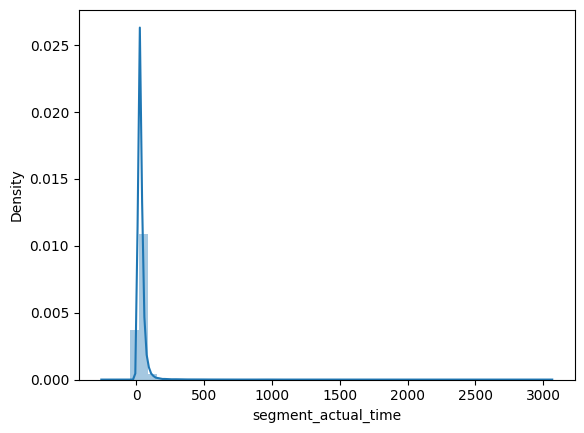

In [46]:
# Univariate analysis of ridership
sns.distplot(df["segment_actual_time"])
# We see that the actual time for each segment has a very big range, but most of the order are completed within 50h

In [48]:
df.describe()
# From the overall data we see that, the first trip is on 2018-09-22 and the last trip is on 2018-10-08.
# The median time taken from source to destination is 449.
# The distance ranges from 9 to 1927km.
# The median time between each segment is 29

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_delivery_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,actual_time/osmr/time,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_act_time/osmr_time
count,144867,144867,144867,144867.000000,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,2018-09-23 02:32:29.393999616,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,2018-09-12 00:02:09.740725,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,2018-09-17 18:59:37,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,2018-09-22 20:31:21,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,2018-09-28 05:14:48.500000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


## Feature creation

In [89]:
# Let us get the city name and place name from source_name
df[["source_city", "source_place"]] = df["source_name"].str.split("_", expand = True).drop(columns = [2,3])

In [90]:
# Let us get the city name and place name from destination_name
df[["destination_city", "destination_place"]] = df["destination_name"].str.split("_", expand = True).drop(columns = [2,3])

In [91]:
# Let us get the state name which is within the brackets from source_name
df['source_name'] = df['source_name'].astype('str')
df["source_state"] = df["source_name"].apply(lambda st: st[st.find("(")+1:st.find(")")])

In [92]:
# Let us get the state name which is within the brackets from source name
df['destination_name'] = df['destination_name'].astype('str')
df["destination_state"] = df["destination_name"].apply(lambda st: st[st.find("(")+1:st.find(")")])

In [93]:
# Let us create columns for year, month and date from trip_creation_time
df["trip_creation_year"] = df["trip_creation_time"].dt.year
df["trip_creation_month"] = df["trip_creation_time"].dt.month
df["trip_creation_day"] = df["trip_creation_time"].dt.day

In [94]:
df['od_trip_duration'] = df["od_end_time"] - df["od_start_time"]

In [95]:
df['od_trip_duration']

0        0 days 01:26:12.818197
1        0 days 01:26:12.818197
2        0 days 01:26:12.818197
3        0 days 01:26:12.818197
4        0 days 01:26:12.818197
                  ...          
144862   0 days 07:07:41.181838
144863   0 days 07:07:41.181838
144864   0 days 07:07:41.181838
144865   0 days 07:07:41.181838
144866   0 days 07:07:41.181838
Name: od_trip_duration, Length: 144867, dtype: timedelta64[ns]

In [96]:
# Dropping the unnecessary columns
df.drop(columns = ["source_center", "source_name", "destination_center", "destination_name", "od_end_time", "od_start_time"], inplace = True)

## Aggregating data on the basis of tip_uuid

In [97]:
df_agg = df.groupby("trip_uuid").agg({
    "data": 'first',
    "trip_creation_time": 'first',
    "route_schedule_uuid": 'first',
    "route_type": 'first', 
    "start_scan_to_end_scan": 'first',
    "source_city": 'first',
    "source_place": 'first', 
    "destination_city": 'first', 
    "destination_place": 'first', 
    "source_state": 'first',
    "destination_state": 'first',
    "trip_creation_year": 'first',
    "trip_creation_month": 'first',
    "trip_creation_day": 'first', 
    "od_trip_duration": 'first',
    "actual_distance_to_destination": 'max',
    "actual_time": 'max',
    "osrm_time": 'max',
    "osrm_distance": "max",
    "actual_time/osmr_time": 'mean',
    "segment_actual_time": 'sum',
    "segment_osrm_time": 'sum',
    "segment_osrm_distance": 'sum',
    "segment_act_time/osmr_time": 'mean'
}).reset_index()

In [74]:
df_agg

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,source_city,source_place,destination_city,destination_place,...,od_trip_duration,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,actual_time/osmr_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_act_time/osmr_time
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,999.0,Bhopal,Trnsport,Kanpur,Central,...,0 days 16:39:30.322728,440.973689,830.0,394.0,544.8027,1.962054,39.692308,25.846154,33.858290,2.022887
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,122.0,Tumkur,Veersagr,Doddablpur,ChikaDPP,...,0 days 02:02:46.769161,48.542890,96.0,42.0,56.9116,1.832792,15.666667,7.222222,9.354378,2.540564
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,3099.0,Bangalore,Nelmngla,Gurgaon,Bilaspur,...,2 days 03:39:43.415483,1689.964663,2736.0,1529.0,2090.8743,1.703628,37.168539,21.808989,28.598515,1.797082
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,Mumbai Hub (Maharashtra),None,Mumbai,MiraRd,...,0 days 01:40:29.696112,17.175274,59.0,15.0,19.6800,3.244444,29.500000,8.000000,9.938300,3.849206
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,152.0,Bellary,Dc (Karnataka),Hospet (Karnataka),WrdN1DPP,...,0 days 02:32:00.774868,59.530350,147.0,46.0,63.6461,2.573923,48.571429,16.428571,20.970271,3.364728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,152.0,Chandigarh,Mehmdpur,Zirakpur,DC (Punjab),...,0 days 02:32:47.270608,31.261599,49.0,34.0,44.5639,1.301065,11.714286,8.857143,9.265014,1.514224
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,60.0,FBD,Balabhgarh,Faridabad,Blbgarh,...,0 days 01:00:35.431279,15.513784,21.0,12.0,16.0882,1.732143,10.500000,5.500000,8.044150,1.982143
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,173.0,Kanpur,Central,Kanpur,GovndNgr,...,0 days 02:53:42.646473,19.349008,190.0,29.0,32.2277,3.880469,46.833333,14.666667,17.481100,3.727787
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,105.0,Tirunelveli,VdkkuSrt,Eral,Busstand,...,0 days 01:45:39.417046,37.387664,90.0,50.0,52.8070,1.388275,15.176471,13.000000,13.148965,1.234944


# 1. Comparing od_trip_duration with start_scan_to_end_scan

In [98]:
# We will convert the data type of the column "od_trip_duration" into seconds, so that it can be plotted
df_agg["od_trip_duration"] = df_agg["od_trip_duration"].astype("int64")

<Axes: xlabel='start_scan_to_end_scan', ylabel='Density'>

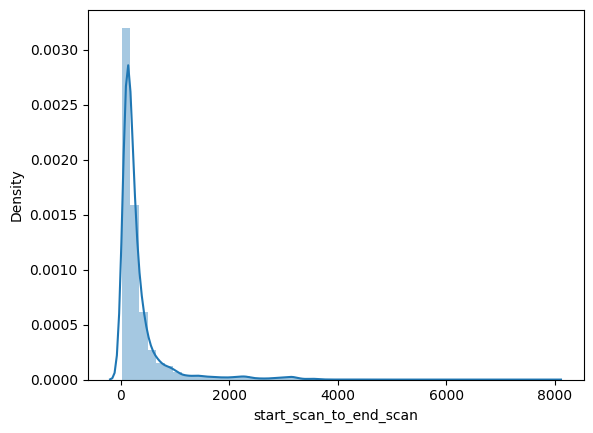

In [21]:
#Univariate analysis of df_agg["start_scan_to_end_scan"]
sns.distplot(df_agg["start_scan_to_end_scan"])

<Axes: xlabel='od_trip_duration', ylabel='start_scan_to_end_scan'>

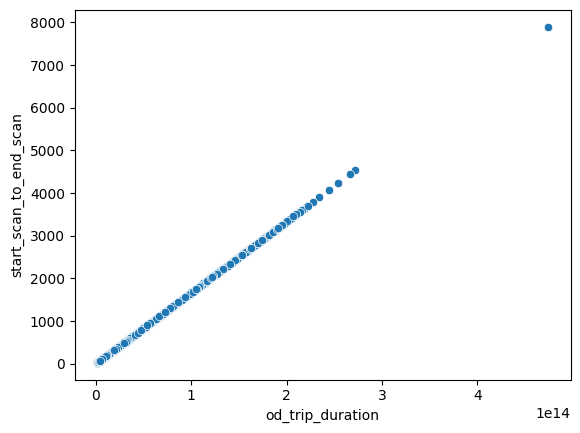

In [83]:
sns.scatterplot(data = df_agg, x = "od_trip_duration", y =  "start_scan_to_end_scan")

In [22]:
df_agg["od_trip_duration"].corr(df_agg["start_scan_to_end_scan"])

0.9999998327770195

## We observe that the columns od_trip_duration and start_scan_to_end_scan are directly correlated with the correlation coefficient almost equal to 1. Even from the graph we can observe that. So basically both these columns are one and the same, we can drop any one of them for training our ML model.

In [99]:
df_agg.drop(columns = "od_trip_duration", inplace = True)

## Detecting Outliers

<Axes: xlabel='start_scan_to_end_scan'>

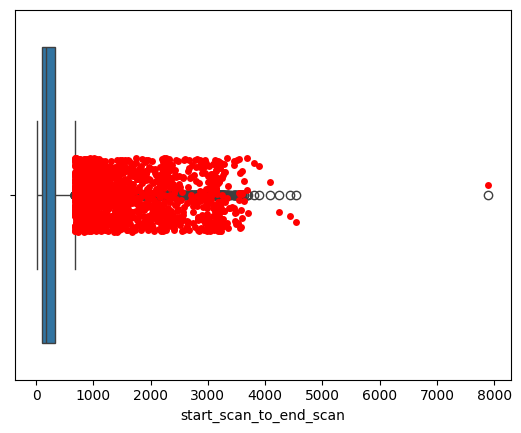

In [103]:
# Outliers in "segment_osrm_distance" column
sns.boxplot(x = df_agg["start_scan_to_end_scan"])
sns.stripplot(x = outlier_func(df_agg["start_scan_to_end_scan"]), color = "red")
# We find out that there are a lot of outliers above the lower whisker.

## Treating outliers

<Axes: xlabel='start_scan_to_end_scan', ylabel='Density'>

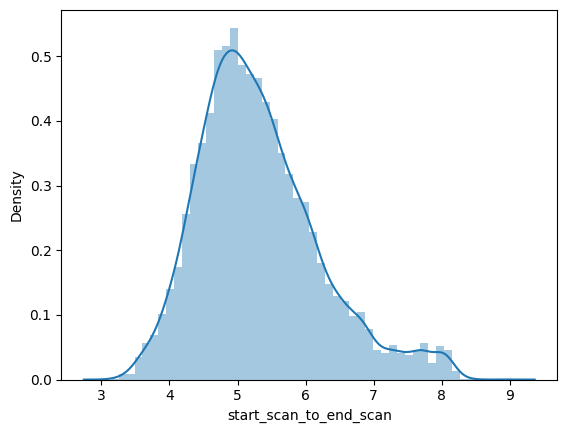

In [96]:
a = np.log1p(df_agg["start_scan_to_end_scan"])
sns.distplot(a)

<Axes: xlabel='start_scan_to_end_scan'>

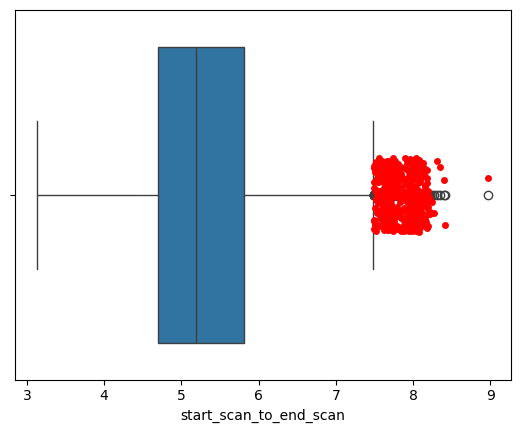

In [104]:
# Outliers in "segment_osrm_distance" column
sns.boxplot(x = a)
sns.stripplot(x = outlier_func(a), color = "red")
# We find out that there are a lot of outliers above the lower whisker.

## Even inspite of converting into log normal scale, we still see some outliers. So let us impute the outliers with median values.

In [60]:
def imputer(a):
    median_value = a.median()
    # Calculate the interquartile range (IQR)
    Q1 =  a.quantile(0.25)
    Q3 =  a.quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (a < lower_bound) | (a > upper_bound)

    # Impute outliers with the median value
    a[outliers] = median_value
    return a

In [100]:
df_agg["start_scan_to_end_scan_imputed"] = imputer(df_agg["start_scan_to_end_scan"])

## Normalizing/standardizing using min - max scaler

In [69]:
def minmax_scaler(a):
    return (a-a.min())/(a.max()-a.min())

In [101]:
df_agg["start_scan_to_end_scan_imputed"] = minmax_scaler(df_agg["start_scan_to_end_scan_imputed"])

# 2. Comparing actual_time with osrm_time

<Axes: xlabel='actual_time', ylabel='osrm_time'>

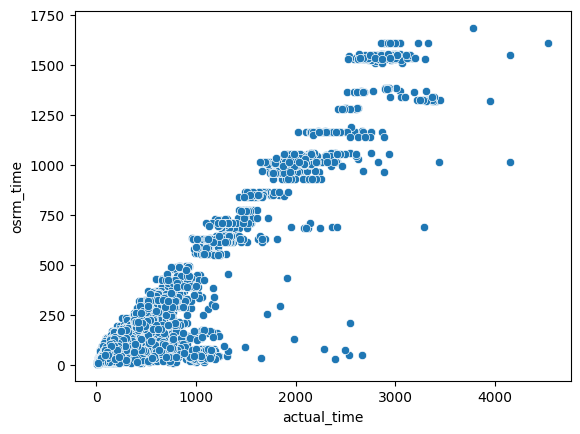

In [113]:
sns.scatterplot(data = df_agg, x = "actual_time", y =  "osrm_time")

In [114]:
df_agg["actual_time"].corr(df_agg["osrm_time"])

0.9538911998326526

## We observe high correlation between actual_time and osrm_time

In [136]:
a = df_agg["actual_time"]/(df_agg["actual_time"].median())
a

0         7.477477
1         0.864865
2        24.648649
3         0.531532
4         1.324324
           ...    
14812     0.441441
14813     0.189189
14814     1.711712
14815     0.810811
14816     2.099099
Name: actual_time, Length: 14817, dtype: float64

In [137]:
b = df_agg["osrm_time"]/(df_agg["osrm_time"].median())
b

0         8.208333
1         0.875000
2        31.854167
3         0.312500
4         0.958333
           ...    
14812     0.708333
14813     0.250000
14814     0.604167
14815     1.041667
14816     0.875000
Name: osrm_time, Length: 14817, dtype: float64

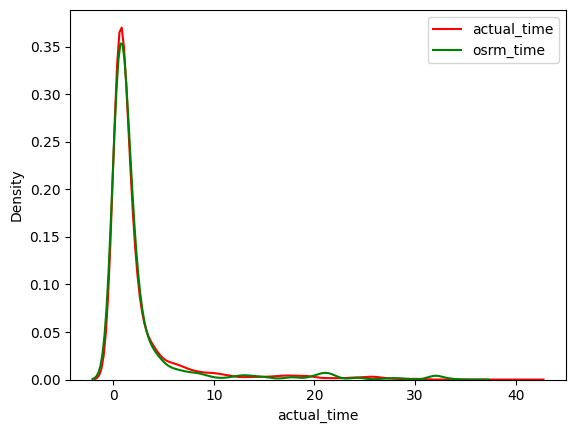

In [138]:
sns.kdeplot(a, color = "red", label = "actual_time")
sns.kdeplot(b, color = 'green', label = "osrm_time")
plt.legend()
# With KDE plot we can do side by side comparision of the two curves.

## Since there are a lot of outliers, Let us impute the outliers with median values.

In [71]:
df_agg["actual_time_imputed"] = imputer(df_agg["actual_time"])
df_agg["osrm_time_imputed"] = imputer(df_agg["osrm_time"])

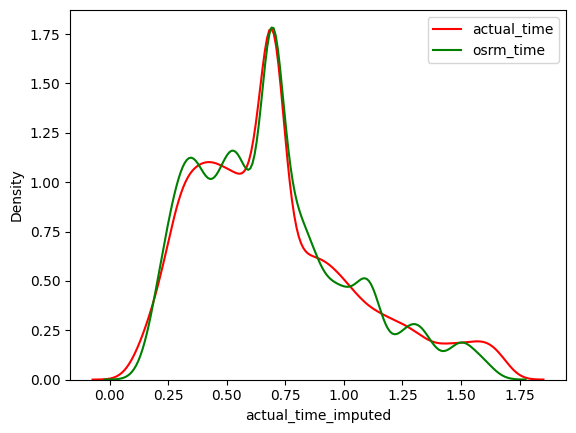

In [72]:
# Let us plot the kde plot after imputing
a0 = df_agg["actual_time_imputed"]/(df_agg["actual_time_imputed"].median())
b0 = df_agg["osrm_time_imputed"]/(df_agg["osrm_time_imputed"].median())
a0 = np.log1p(a0)
b0 = np.log1p(b0)
sns.kdeplot(a0, color = "red", label = "actual_time")
sns.kdeplot(b0, color = 'green', label = "osrm_time")
plt.legend()

## It seems that the curve doesn't follow normal distribution, but actual_time and Osrm_time do follow each other. There is some degree of similiarity. Since the two variables are numerical data, and they don't appear to follow normal distribution we will use KS test.

## Null Hypothesis: Actual time aggregated value and OSRM time aggregated value are taken from the same distribution
## Alternate Hypothesis: Actual time aggregated value and OSRM time aggregated value are different
## Test: KS test for independant samples.
## significance level: 0.05

In [47]:
stats.kstest(a0,b0)

KstestResult(statistic=0.02929067962475529, pvalue=5.904917350307763e-06, statistic_location=1.1460788259070334, statistic_sign=-1)

## p<<0.05, therefore the alternate hypothesis is true.

# The results of the test make it clear that the two samples come from different distributions. 

## Normalizing/standardizing using min - max scaler

In [102]:
df_agg["actual_time_imputed"] = minmax_scaler(a0)
df_agg["osrm_time_imputed"] = minmax_scaler(b0)

# 3. Comparing actual_time with segment_actual_time

<Axes: xlabel='actual_time', ylabel='segment_actual_time'>

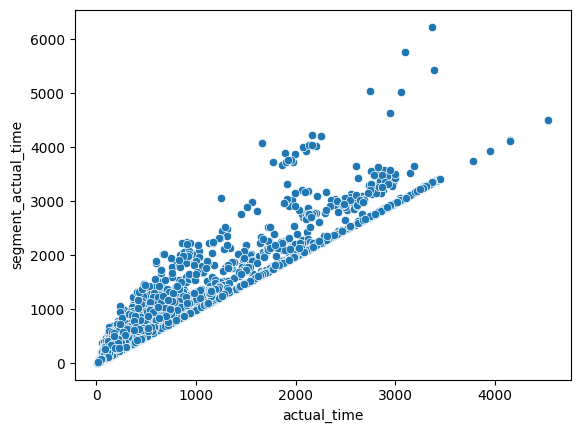

In [49]:
sns.scatterplot(data = df_agg, x = "actual_time", y =  "segment_actual_time")

In [51]:
df_agg["actual_time"].corr(df_agg["segment_actual_time"])

0.9585323357636127

## We observe high correlation between actual_time and segment_actual_time

In [53]:
a = df_agg["actual_time"]/(df_agg["actual_time"].median())
b = df_agg["segment_actual_time"]/(df_agg["segment_actual_time"].median())

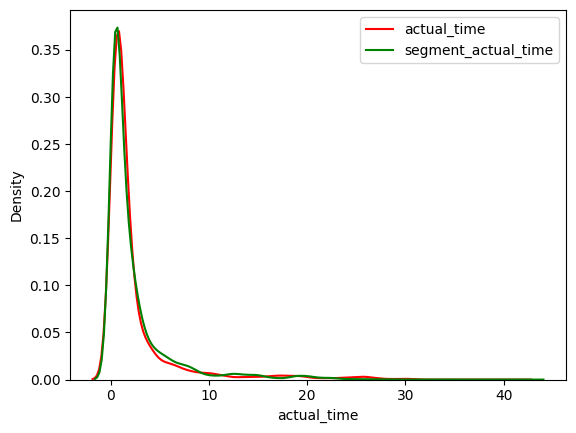

In [54]:
sns.kdeplot(a, color = "red", label = "actual_time")
sns.kdeplot(b, color = 'green', label = "segment_actual_time")
plt.legend()

## We observe that the curves are right skewed. So we will be converting them into log normal scale.

<Axes: xlabel='segment_actual_time', ylabel='Density'>

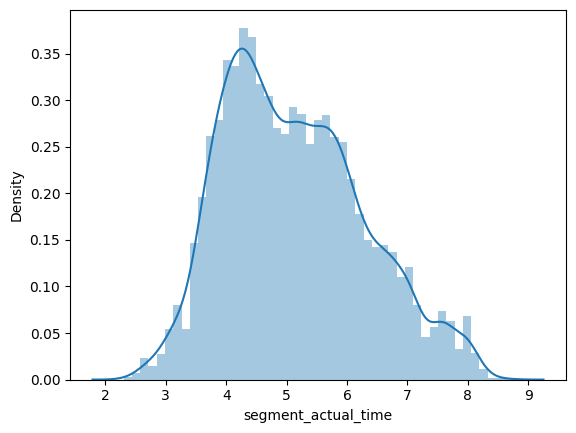

In [103]:
a = np.log1p(df_agg["segment_actual_time"])
sns.distplot(a)

## Let us test whether the curve is normal or not using the Wilkin Shapiro test
## Null Hypothesis: the distribution is taken from a normal distribution.
## Alternate hypothesis: the distribution is not normal
## p = 0.05

In [75]:
## Let us test whether the curve is normal or not
stats.shapiro(a)

ShapiroResult(statistic=0.9779465198516846, pvalue=1.661939978689233e-42)

## Since p is smaller than 0.05, we can say that we will be rejecting the null hypothesis, so the distribution is not normal.

## Scaling the variables

In [104]:
df_agg["segment_actual_time_imputed"] = minmax_scaler(a)
df_agg["actual_time_imputed"] = minmax_scaler(np.log1p(df_agg["actual_time"]))

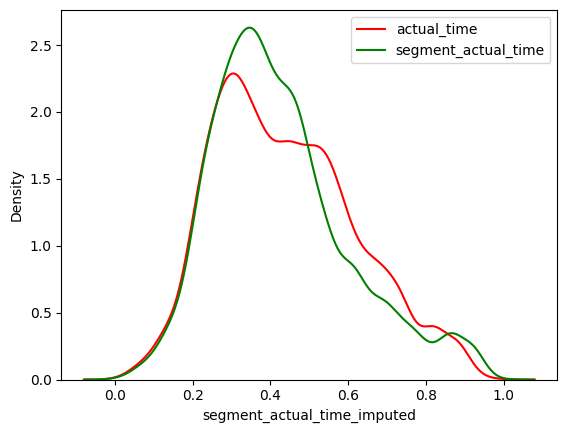

In [105]:
sns.kdeplot(df_agg["segment_actual_time_imputed"], color = "red", label = "actual_time")
sns.kdeplot(df_agg["actual_time_imputed"], color = 'green', label = "segment_actual_time")
plt.legend()

<Axes: xlabel='segment_actual_time_imputed', ylabel='actual_time_imputed'>

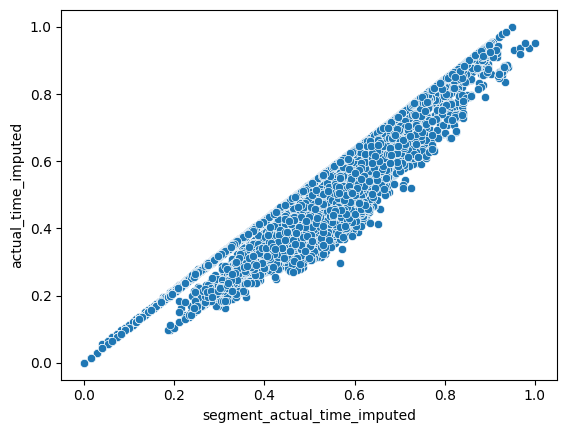

In [106]:
sns.scatterplot(data = df_agg, x = "segment_actual_time_imputed", y =  "actual_time_imputed")

In [108]:
df_agg["actual_time_imputed"].corr(df_agg["segment_actual_time_imputed"])

0.9566229910465973

## It seems that the curve doesn't follow normal distribution, but actual_time and segment_actual_time do follow each other. There is some degree of similiarity. Since the two variables are numerical data, and they don't appear to follow normal distribution we will use KS test.

## Null Hypothesis: Actual time aggregated value and segment actual time aggregated value are taken from the same distribution
## Alternate Hypothesis: Actual time aggregated value and segment actual time aggregated value are different
## Test: KS test for independant samples.
## significance level: 0.05

In [107]:
stats.kstest(df_agg["segment_actual_time_imputed"],df_agg["actual_time_imputed"])

KstestResult(statistic=0.08301275561854626, pvalue=7.399132107794807e-45, statistic_location=0.4905899200069058, statistic_sign=-1)

## p<<0.05, therefore the alternate hypothesis is true. The results of the test make it clear that the two samples come from different distributions.

# 4. Comparing osrm distance aggregated value and segment osrm distance aggregated value

<Axes: xlabel='osrm_distance', ylabel='Density'>

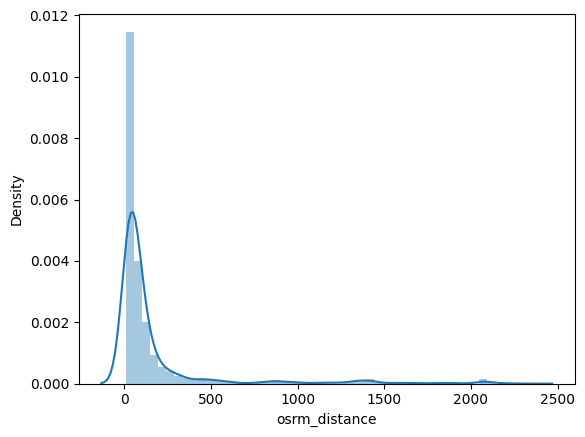

In [110]:
#Univariate analysis of df_agg["osrm_distance"]
sns.distplot(df_agg["osrm_distance"])

<Axes: xlabel='segment_osrm_distance', ylabel='Density'>

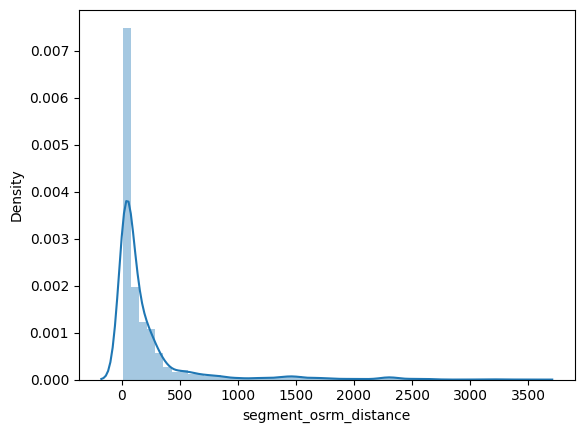

In [111]:
#Univariate analysis of df_agg["segment_osrm_distance"]
sns.distplot(df_agg["segment_osrm_distance"])

<Axes: xlabel='osrm_distance'>

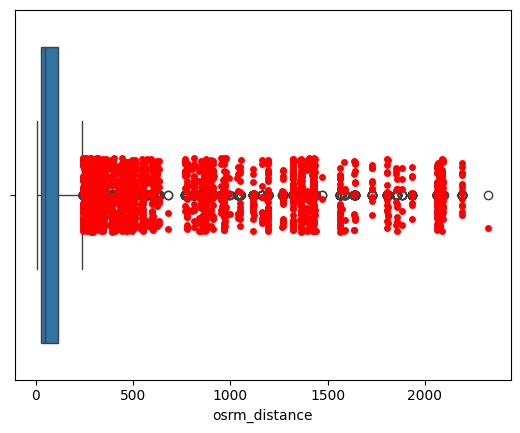

In [114]:
# Outliers in "osrm_distance" column
sns.boxplot(x = df_agg["osrm_distance"])
sns.stripplot(x = outlier_func(df_agg["osrm_distance"]), color = "red")
# We find out that there are a lot of outliers above the upper whisker.

<Axes: xlabel='segment_osrm_distance'>

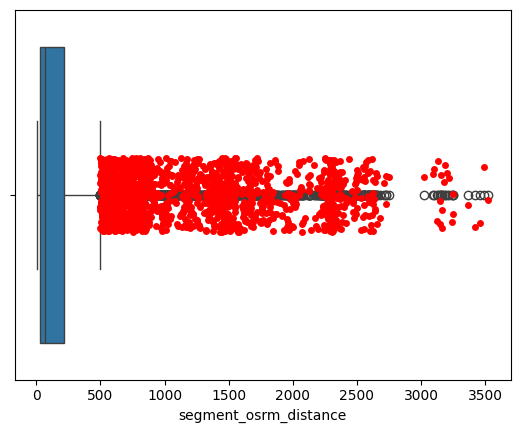

In [115]:
# Outliers in "segment_osrm_distance" column
sns.boxplot(x = df_agg["segment_osrm_distance"])
sns.stripplot(x = outlier_func(df_agg["segment_osrm_distance"]), color = "red")
# We find out that there are a lot of outliers above the upper whisker.

## Treating outliers

<Axes: xlabel='osrm_distance', ylabel='Density'>

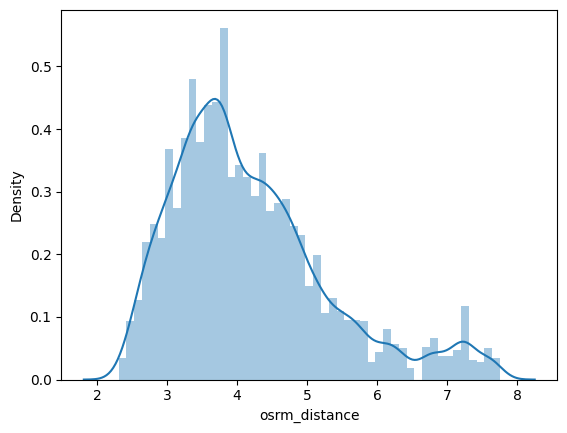

In [116]:
a = np.log1p(df_agg["osrm_distance"])
sns.distplot(a)

<Axes: xlabel='segment_osrm_distance', ylabel='Density'>

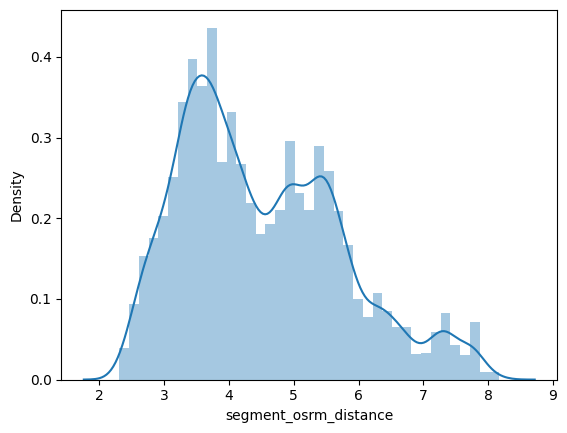

In [117]:
b = np.log1p(df_agg["segment_osrm_distance"])
sns.distplot(b)

## Normalizing/standardizing using min - max scaler

In [119]:
df_agg["osrm_distance_imputed"] = minmax_scaler(a)
df_agg["segment_osrm_distance_imputed"] = minmax_scaler(b)

In [120]:
df_agg["osrm_distance_imputed"].corr(df_agg["segment_osrm_distance_imputed"])

0.9550972784100195

<Axes: xlabel='osrm_distance_imputed', ylabel='segment_osrm_distance_imputed'>

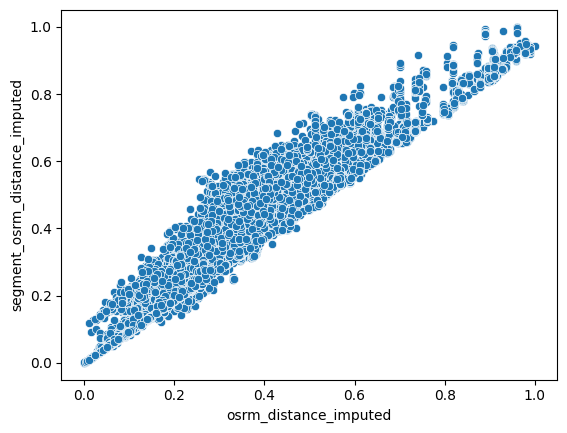

In [121]:
sns.scatterplot(data = df_agg, x = "osrm_distance_imputed", y =  "segment_osrm_distance_imputed")

## It seems that the curve doesn't follow normal distribution, but actual_time and segment_actual_time do follow each other. There is some degree of similiarity. Since the two variables are numerical data, and they don't appear to follow normal distribution we will use KS test.

## Null Hypothesis: Actual time aggregated value and segment actual time aggregated value are taken from the same distribution
## Alternate Hypothesis: Actual time aggregated value and segment actual time aggregated value are different
## Test: KS test for independant samples.
## significance level: 0.05

In [122]:
stats.kstest(df_agg["osrm_distance_imputed"],df_agg["segment_osrm_distance_imputed"])

KstestResult(statistic=0.11675777822771138, pvalue=1.9249076547636587e-88, statistic_location=0.4374474698869129, statistic_sign=1)

## p<<0.05, therefore the alternate hypothesis is true. The results of the test make it clear that the two samples come from different distributions.

# 5. Comparing osrm time aggregated value and segment osrm time aggregated value

<Axes: xlabel='osrm_time', ylabel='Density'>

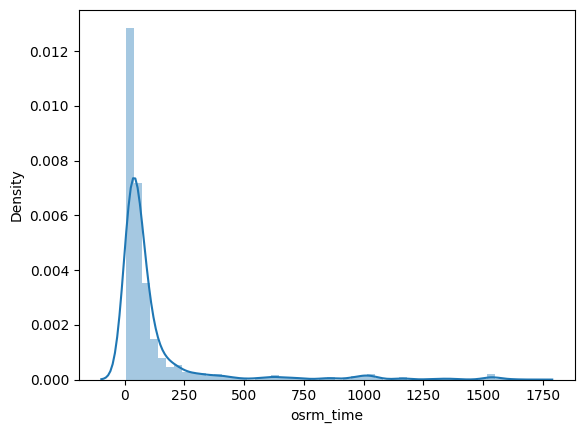

In [123]:
#Univariate analysis of df_agg["osrm_distance"]
sns.distplot(df_agg["osrm_time"])

<Axes: xlabel='segment_osrm_time', ylabel='Density'>

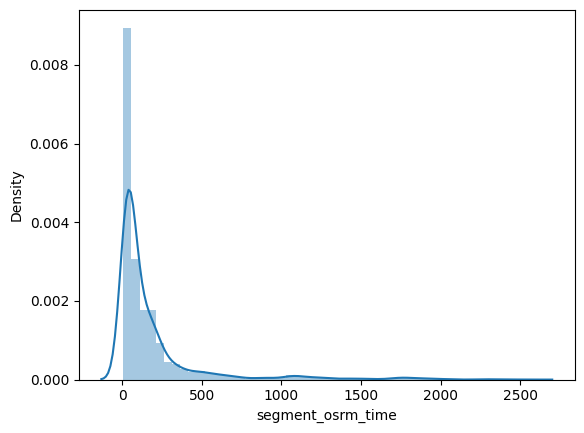

In [124]:
#Univariate analysis of df_agg["osrm_distance"]
sns.distplot(df_agg["segment_osrm_time"])

<Axes: xlabel='osrm_time'>

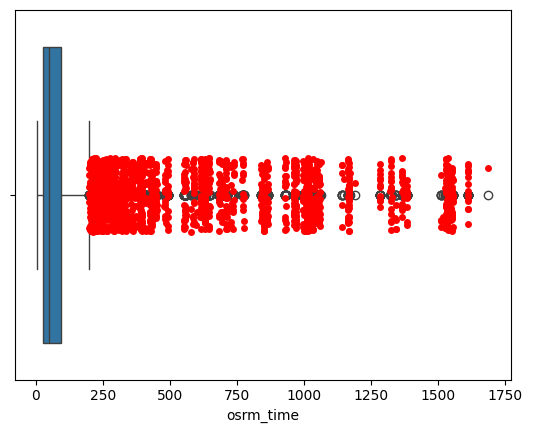

In [125]:
# Outliers in "osrm_time" column
sns.boxplot(x = df_agg["osrm_time"])
sns.stripplot(x = outlier_func(df_agg["osrm_time"]), color = "red")
# We find out that there are a lot of outliers above the upper whisker.

<Axes: xlabel='segment_osrm_time'>

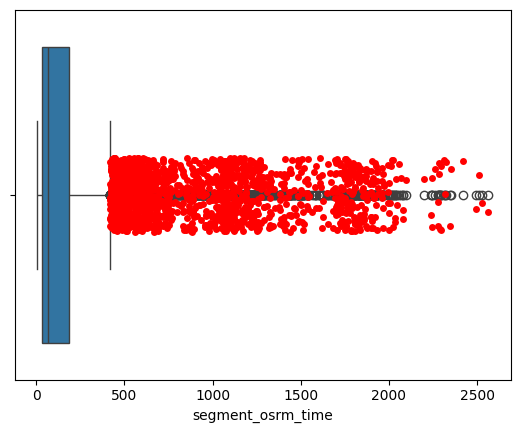

In [126]:
# Outliers in "segment_osrm_time" column
sns.boxplot(x = df_agg["segment_osrm_time"])
sns.stripplot(x = outlier_func(df_agg["segment_osrm_time"]), color = "red")
# We find out that there are a lot of outliers above the upper whisker.

## Treating outliers

<Axes: xlabel='osrm_time', ylabel='Density'>

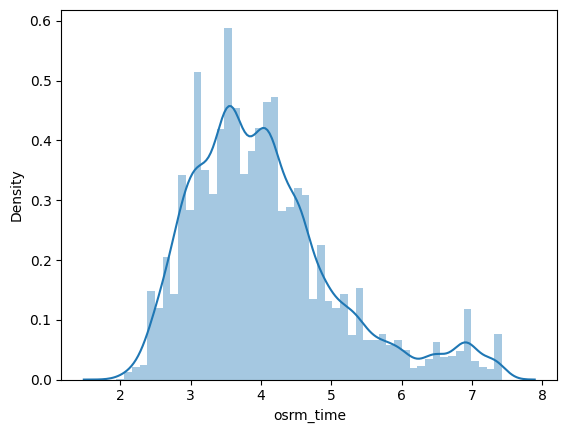

In [129]:
a = np.log1p(df_agg["osrm_time"])
sns.distplot(a)

<Axes: xlabel='segment_osrm_time', ylabel='Density'>

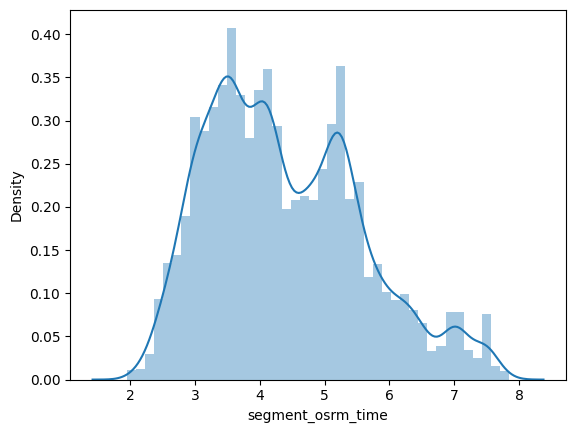

In [130]:
b = np.log1p(df_agg["segment_osrm_time"])
sns.distplot(b)

## Normalizing/standardizing using min - max scaler

In [131]:
df_agg["osrm_time_imputed"] = minmax_scaler(a)
df_agg["segment_osrm_time_imputed"] = minmax_scaler(b)

In [132]:
df_agg["osrm_time_imputed"].corr(df_agg["segment_osrm_time_imputed"])

0.948940474436486

<Axes: xlabel='osrm_time_imputed', ylabel='segment_osrm_time_imputed'>

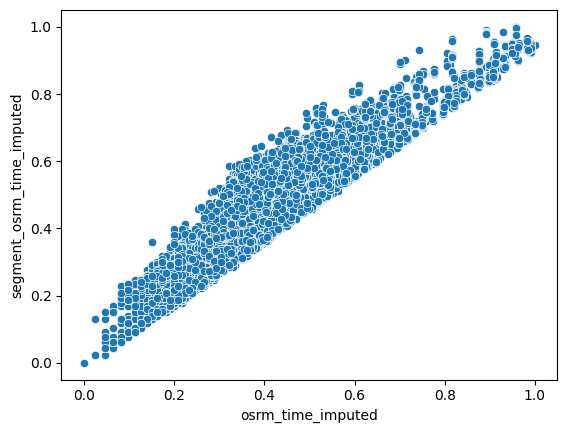

In [133]:
sns.scatterplot(data = df_agg, x = "osrm_time_imputed", y =  "segment_osrm_time_imputed")

## It seems that the curve doesn't follow normal distribution, but segment_osrm_time_imputed and osrm_time_imputed do follow each other. There is some degree of similiarity. Since the two variables are numerical data, and they don't appear to follow normal distribution we will use KS test.

## Null Hypothesis: osrm_time_imputed and segment_osrm_time_imputed are taken from the same distribution
## Alternate Hypothesis: osrm_time_imputed and segment_osrm_time_imputed are different
## Test: KS test for independant samples.
## significance level: 0.05

In [134]:
stats.kstest(df_agg["osrm_time_imputed"],df_agg["segment_osrm_time_imputed"])

KstestResult(statistic=0.1368698117027738, pvalue=1.6523278092778216e-121, statistic_location=0.49199282722919, statistic_sign=1)

## p<<0.05, therefore the alternate hypothesis is true. The results of the test make it clear that the two samples come from different distributions.

# One hot encoding of the columns - 'data' and 'route_type'

In [140]:
df_agg = pd.get_dummies(df_agg, columns = ["data", "route_type"])
df_agg

,trip_uuid,trip_creation_time,route_schedule_uuid,start_scan_to_end_scan,source_city,source_place,destination_city,destination_place,source_state,destination_state,...,actual_time_imputed,osrm_time_imputed,segment_actual_time_imputed,osrm_distance_imputed,segment_osrm_distance_imputed,segment_osrm_time_imputed,data_test,data_training,route_type_Carting,route_type_FTL
0,trip-153671041653548748,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,178.0,Bhopal,Trnsport,Kanpur,Central,Madhya Pradesh,Uttar Pradesh,...,0.722636,0.735301,0.783684,0.733552,0.832523,0.841967,False,True,False,True
1,trip-153671042288605164,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,122.0,Tumkur,Veersagr,Doddablpur,ChikaDPP,Karnataka,Karnataka,...,0.371472,0.330968,0.412333,0.321368,0.364483,0.380051,False,True,True,False
2,trip-153671043369099517,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,178.0,Bangalore,Nelmngla,Gurgaon,Bilaspur,Karnataka,Haryana,...,0.917515,0.982190,0.901644,0.980413,0.944492,0.952871,False,True,False,True
3,trip-153671046011330457,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,100.0,Mumbai Hub (Maharashtra),None,Mumbai,MiraRd,Maharashtra,Maharashtra,...,0.292936,0.150722,0.278452,0.132165,0.124414,0.150293,False,True,True,False
4,trip-153671052974046625,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,152.0,Bellary,Dc (Karnataka),Hospet (Karnataka),WrdN1DPP,Karnataka,Karnataka,...,0.440547,0.347185,0.548478,0.341581,0.458536,0.475571,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,152.0,Chandigarh,Mehmdpur,Zirakpur,DC (Punjab),Punjab,Punjab,...,0.263128,0.293436,0.328881,0.277308,0.320538,0.372171,True,False,True,False
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,60.0,FBD,Balabhgarh,Faridabad,Blbgarh,Haryana,Haryana,...,0.128905,0.112865,0.122532,0.097112,0.090231,0.091296,True,False,True,False
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,173.0,Kanpur,Central,Kanpur,GovndNgr,Uttar Pradesh,Uttar Pradesh,...,0.482247,0.265331,0.518955,0.219296,0.401613,0.430693,True,False,True,False
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,105.0,Tirunelveli,VdkkuSrt,Eral,Busstand,Tamil Nadu,Tamil Nadu,...,0.361032,0.362076,0.505733,0.307861,0.529932,0.585515,True,False,True,False


# Business Insights:

## 1. Full Truck Load orders are twice as many as Carting orders. 
## 2. Most orders are coming from Gurgaon Bilaspur - Harayana.
## 3. Most orders are going to Gurgaon Bilaspur - Harayana.
## 4. Actual time for each segment has a very big range, but most of the order are completed within 50h
## 5. Segment actual time is usually always more than segment OSRM time. Therefore it is evident that orders always gets delayed from the estimated time.

In [152]:
np.mean(df_agg["actual_distance_to_destination"]/df_agg["osrm_distance"])

0.7795901078631176

## 6. On average actual distance is less than OSRM distance. 

In [159]:
df_agg["source_state"].mode()

0    Maharashtra
Name: source_state, dtype: object

## 7. The state with highest number of orders sourced from is Maharashtra.

In [161]:
df_agg["destination_state"].mode()

0    Maharashtra
Name: destination_state, dtype: object

## 8. The state with highest number of orders delivered to is also Maharashtra.

<Axes: xlabel='trip_creation_month', ylabel='count'>

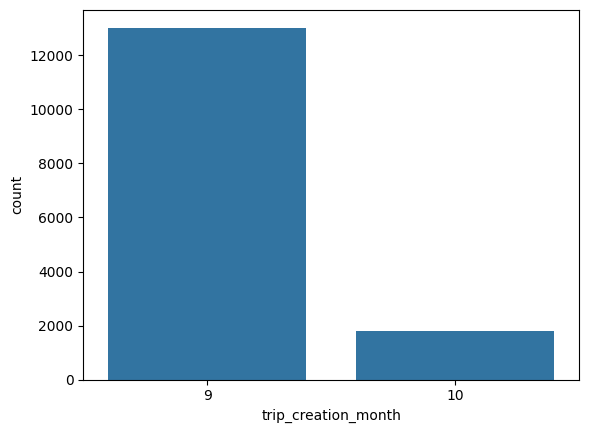

In [162]:
sns.countplot(data = df_agg, x = "trip_creation_month")

<Axes: xlabel='trip_creation_day', ylabel='count'>

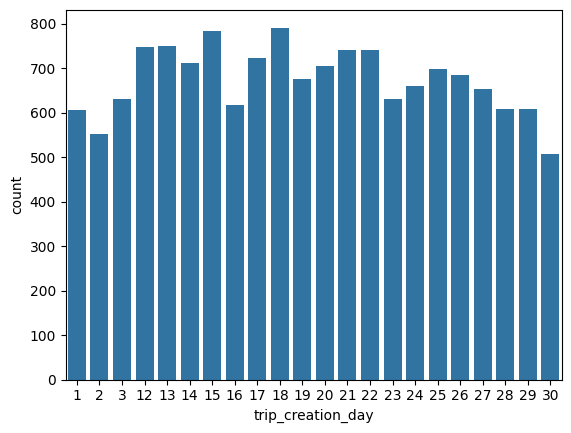

In [163]:
sns.countplot(data = df_agg, x = "trip_creation_day")

## 9. Most of the trips are created in september month.

In [165]:
df_agg.describe()

,trip_creation_time,start_scan_to_end_scan,trip_creation_year,trip_creation_month,trip_creation_day,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,actual_time/osmr_time,...,segment_osrm_time,segment_osrm_distance,segment_act_time/osmr_time,start_scan_to_end_scan_imputed,actual_time_imputed,osrm_time_imputed,segment_actual_time_imputed,osrm_distance_imputed,segment_osrm_distance_imputed,segment_osrm_time_imputed
count,14817,14817.000000,14817.0,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,...,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,199.613012,2018.0,9.120672,18.370790,125.199848,278.067760,121.826348,155.877220,2.416638,...,180.949787,223.201161,2.612084,0.274094,0.425576,0.384415,0.439130,0.344687,0.375476,0.414261
min,2018-09-12 00:00:16.535741,22.000000,2018.0,9.000000,1.000000,9.002461,9.000000,6.000000,9.072900,0.610398,...,6.000000,9.072900,-0.092105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-17 02:51:25.129125888,108.000000,2018.0,9.000000,14.000000,21.195101,62.000000,26.000000,28.145100,1.650316,...,31.000000,32.654500,1.602774,0.132716,0.300913,0.246122,0.295601,0.195209,0.205934,0.257432
50%,2018-09-22 04:02:35.066945024,178.000000,2018.0,9.000000,19.000000,39.380044,111.000000,48.000000,50.380600,1.994921,...,65.000000,70.154400,1.980855,0.240741,0.394980,0.354783,0.418765,0.299383,0.333750,0.380051
75%,2018-09-27 19:37:41.898427904,247.000000,2018.0,9.000000,25.000000,85.645246,236.000000,95.000000,113.206600,2.573479,...,185.000000,218.802400,2.625000,0.347222,0.517526,0.477399,0.560320,0.446142,0.526297,0.555546
max,2018-10-03 23:59:42.701692,670.000000,2018.0,10.000000,30.000000,1927.447705,4532.000000,1686.000000,2326.199100,70.000000,...,2564.000000,3523.632400,125.247764,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,128.768037,0.0,0.325757,7.893275,268.385124,485.760973,237.105598,324.809786,1.841208,...,314.542047,416.628374,3.378314,0.198716,0.176916,0.192506,0.181821,0.207449,0.213622,0.202730


## 10. Average distance between source and destination is 125 Km, where as the average time is 278h 

In [169]:
df_agg.groupby(["source_city", "destination_city"])["trip_uuid"].count().sort_values(ascending = False)

source_city         destination_city
Bengaluru           Bengaluru           528
Bangalore           Bengaluru           492
Bhiwandi            Mumbai              407
Bengaluru           Bangalore           336
Hyderabad           Hyderabad           308
                                       ... 
Almora              Pithorgarh            1
                    Ranikhet              1
Vadodara (Gujarat)  Vadodara              1
Vaijiapur           Nashik                1
Vapi                Daman                 1
Name: trip_uuid, Length: 1407, dtype: int64

## 11. We see that the busiest routes are from Bangalore to Bangalore and Bhiwandi to Mumbai.

# Recommendations

## 1. Delhivery should optimise and prioritize FTL packages as they make up signicantly more number of orders.
## 2. Delhivery should decentralize and develop new warehouses around Gurgaon, since it handles the highest number of orders in and out. So that it is not over burdened and over dependent.
## 4. Actual time for some of the orders are very large, so delhivery should make warehouses in remote areas where it is taking a lot of time to deliver
## 5. Since actual time is always more than OSRM time, we need to improve the OSRM time estimation which is not able to estimate time properly.
## 6. Since actual time is always more than OSRM time, we need to investigate why there are frequent delays and build necessary logistic capabilities to reduce the time.

## 7. Since actual distance is always more than OSRM distance, we need to improve the OSRM distance estimation which is not able to estimate distance properly.
## 8. Special emphasis needs to be given to warehouses in Maharastra, logistic facility needs to be upgraded since a lot of orders are sourced and delivered here.
## 9. Special emphasis needs to be given to routes from Bangalore to Bangalore and Bhiwandi to Mumbai. Logistic facility needs to be upgraded since a lot of orders are sourced and delivered here.

## 10. Average distance is 125Km and average time is 278h, which gives around 0.5km travelled for every hour. Therefore speed is very slow. Delhivery needs to ask its drivers to increase speed, decrease warehouse downtime which eats away a lot of time.